In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for drawing charts and graphs
from collections import Counter
from sklearn.metrics import confusion_matrix # model quality assessment
import itertools
import seaborn as sns # for graphical display of results
from keras.optimizers import Adam

Loading the training dataset

In [25]:
train = pd.read_csv("mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exploring the distribution of classes in data

In [26]:
z_train = Counter(train['label'])
z_train

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

<Axes: xlabel='label', ylabel='count'>

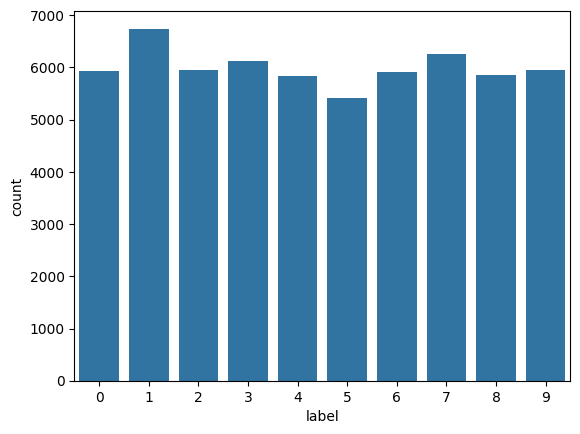

In [27]:
#sns.countplot(train['label'])
sns.countplot(x="label",data=train)

Loading the test data set

In [28]:
test = pd.read_csv("mnist_test.csv")
print(test.iloc[:,1:].shape)
test.head()

(10000, 784)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Defining a Target Variable

In [29]:
x_train = (train.iloc[:,1:].values).astype('float32')
y_train = (train.iloc[:,0].values).astype('int32')
x_test = (test.iloc[:,1:].values).astype('float32')
y_test = (test.iloc[:,0].values).astype('int32')

Data Conversion

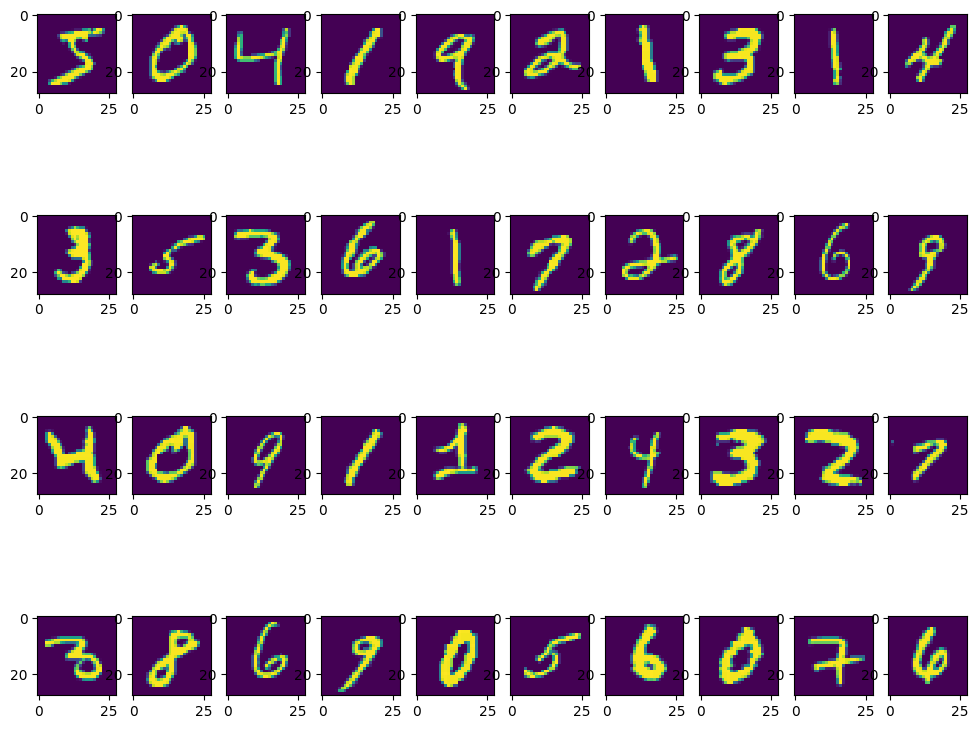

In [30]:
%matplotlib inline
# look at the pictures first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):
  plt.subplot(y, x, i+1)
  plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [31]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [32]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test_samples')

x_train shape: (60000, 784)
x_test shape: (10000, 784)
60000 train_samples
10000 test_samples


In [33]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Connecting a library for working with neural networks

In [34]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers.LayerNormalization import batch_normalization
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [35]:
batch_size = 64
num_classes = 10
epochs = 50
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
input_shape = (28, 28, 1)

In [36]:
# Convert from a vector class to a matrix class using the operation One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape, kernel_regularizer='l1'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    synchronized=False)
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

datagen = ImageDataGenerator( featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=15,
                             zoom_range= 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
datagen.fit(X_train)
h = model.fit(datagen.flow(X_train, Y_train, batch_size = batch_size),
                        epochs = epochs, validation_data = (X_val, Y_val),
                        callbacks=[early_stopping],
                        verbose=1, steps_per_epoch=X_train.shape[0] // batch_size
                        ,)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.7263 - loss: 1.7673 - val_accuracy: 0.9600 - val_loss: 0.4747
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.9198 - loss: 0.5378 - val_accuracy: 0.9668 - val_loss: 0.2836
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.9359 - loss: 0.3661 - val_accuracy: 0.9596 - val_loss: 0.2511
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - accuracy: 0.9452 - loss: 0.2929 - val_accuracy: 0.9456 - val_loss: 0.2804
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.9512 - loss: 0.2543 - val_accuracy: 0.9812 - val_loss: 0.1484
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 60s 80ms/step - accuracy: 0.9527 - loss: 0.2364 - val_accuracy: 0.9499 - val_loss: 0.2377
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9551 - loss: 0.2184 - val_accuracy: 0.9833 - val_loss: 0.1216
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9580 - loss: 0.2059 - val_accurac

In [39]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0876, final accuracy: 0.9874


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


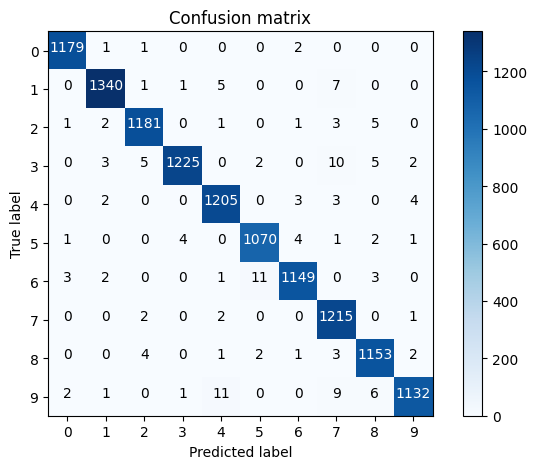

In [40]:
from sklearn.metrics.pairwise import normalize
from seaborn._core.properties import HorizontalAlignment
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=0)
  plt.yticks(tick_marks, classes)

  if normalize : cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment ="center",
             color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred=model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))


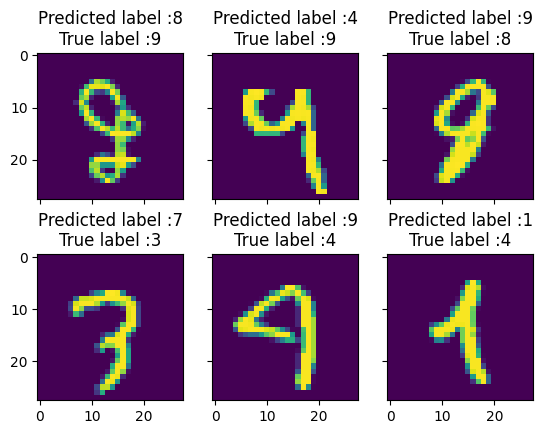

In [41]:
# Errors - difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
  # this function shows 6 images with their predicted and true labels
  n = 0
  nrows = 2
  ncols = 3
  fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error = errors_index[n]
      ax[row,col].imshow((img_errors[error]).reshape((28,28)))
      ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
      n += 1

Y_pred_errors_prob = np.max(Y_pred_errors, axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis = 1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_delta_errors[-6:]
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [42]:
test_labels = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


Predicted [2.5578767e-11 2.4771350e-07 6.5033159e-06 2.2143961e-06 2.3239435e-09
 1.8438609e-10 1.7989314e-16 9.9998933e-01 1.8608675e-08 1.5762073e-06]


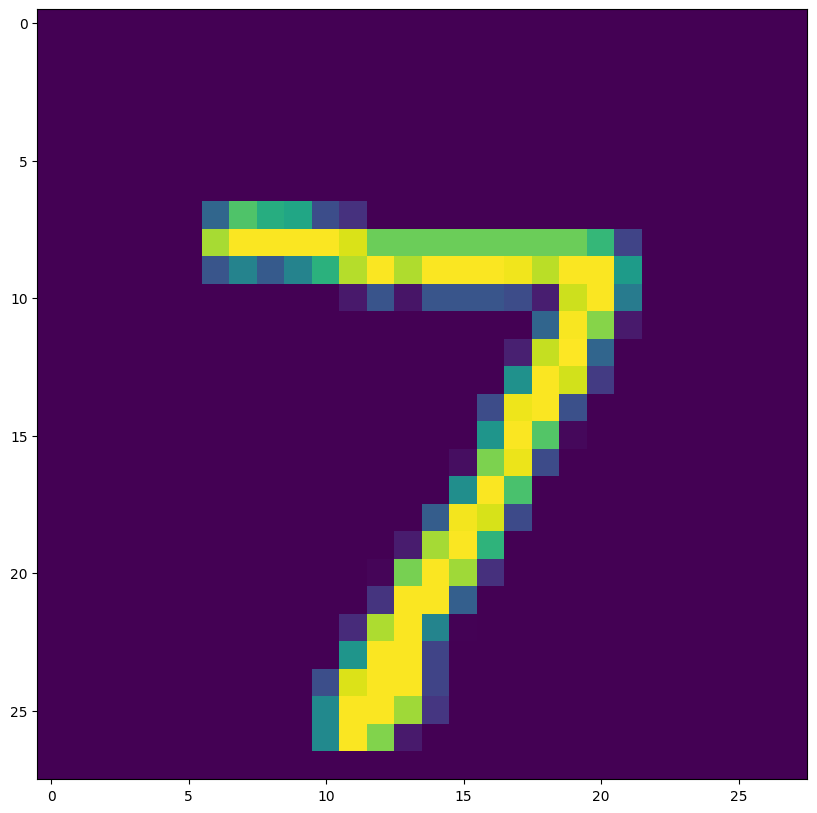

Predicted [3.5486281e-09 1.0516009e-05 9.9998885e-01 4.1238283e-07 4.0547095e-09
 7.8260037e-14 7.5433304e-09 4.5695685e-08 8.6975902e-08 3.2089939e-10]


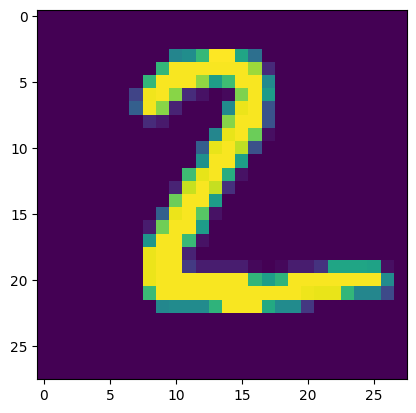

Predicted [6.7536785e-09 9.9999672e-01 2.8675964e-09 1.1199876e-12 2.9042963e-06
 9.0665306e-09 3.0449886e-08 8.7659423e-08 2.4835836e-08 5.2990949e-08]


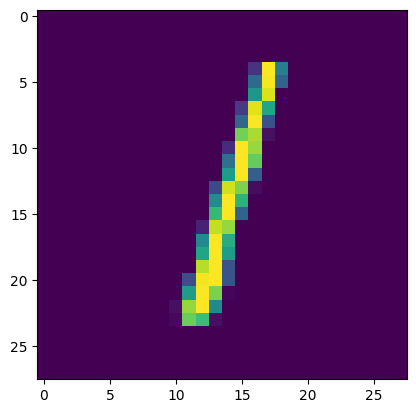

Predicted [9.9994415e-01 7.2036443e-09 4.0676946e-06 2.1809186e-08 9.9530155e-08
 6.5850980e-07 4.7715239e-05 2.3549010e-10 1.2980988e-06 1.9327472e-06]


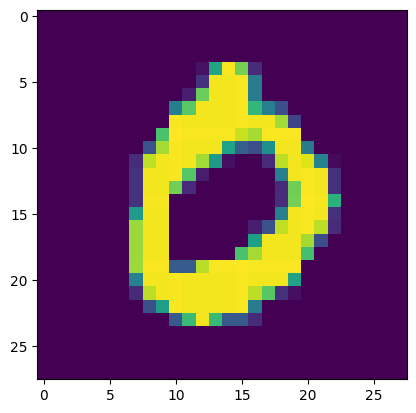

Predicted [1.18152779e-11 3.65562913e-10 2.10020557e-09 9.44262138e-13
 9.99997199e-01 1.00253165e-11 6.75451584e-10 3.79054482e-10
 6.71680933e-10 2.73427145e-06]


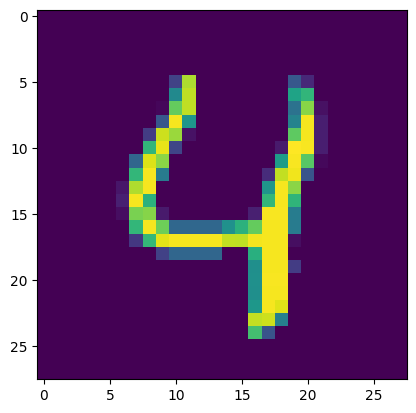

Predicted [7.2857467e-09 9.9999887e-01 1.2347315e-09 6.2873215e-13 7.9621913e-07
 1.0264047e-09 4.6089492e-09 1.3772969e-07 3.1425223e-08 8.2636042e-08]


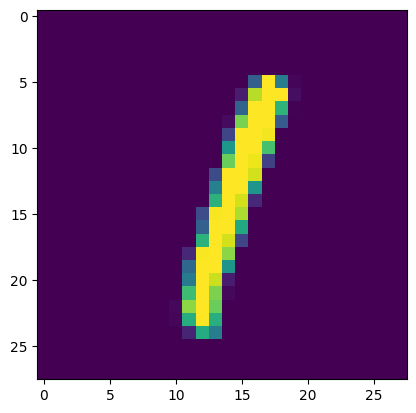

Predicted [1.9017978e-14 6.7683070e-10 2.3507256e-09 9.9291270e-12 9.9970233e-01
 2.2191875e-09 5.7593952e-13 6.7672204e-07 3.9566879e-07 2.9654935e-04]


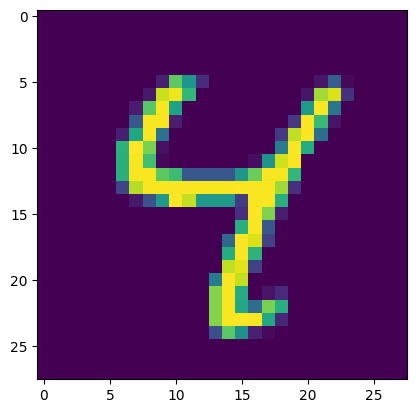

Predicted [2.2057586e-07 8.3033992e-06 1.1225198e-04 1.7097613e-05 1.4052651e-03
 2.6605085e-05 8.2001684e-08 1.2267026e-04 6.6397497e-03 9.9166769e-01]


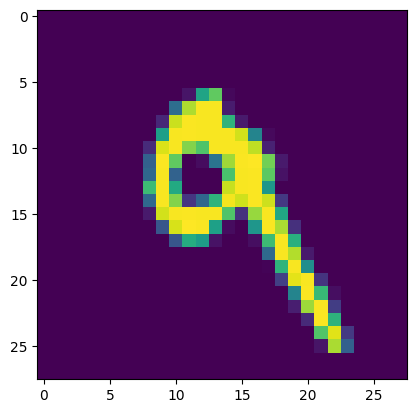

Predicted [1.3927593e-06 1.4212452e-06 5.1748197e-05 2.2939003e-05 3.3890623e-07
 9.7271919e-01 2.5154496e-02 3.5562093e-06 2.0365564e-03 8.4372268e-06]


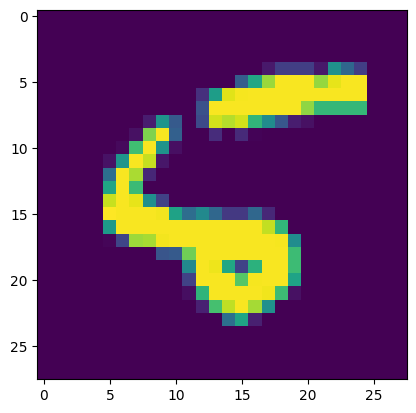

Predicted [5.84915505e-10 4.76642077e-12 4.92092305e-08 5.03695645e-08
 7.44646532e-05 6.02048145e-09 6.46256281e-15 1.03825994e-04
 1.09575223e-04 9.99712110e-01]


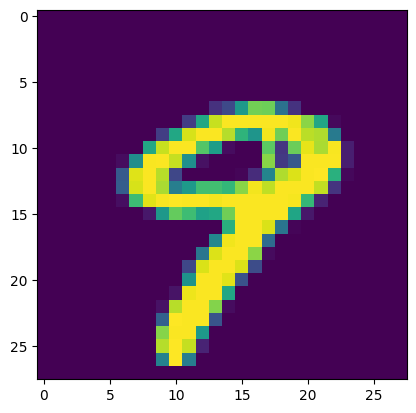

Predicted [9.9999982e-01 1.1501379e-13 1.3122952e-08 7.3862726e-13 5.5073215e-13
 2.9538444e-10 2.2815758e-09 1.6453032e-11 2.1987520e-10 6.0530795e-08]


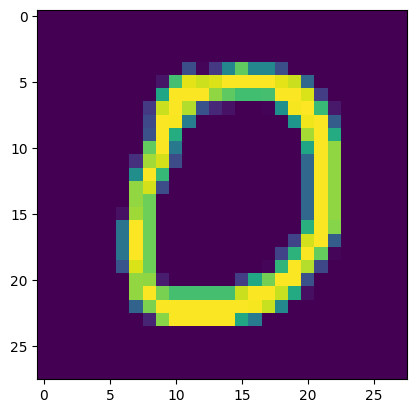

Predicted [1.2824153e-04 4.4833842e-13 6.6916918e-08 5.4203038e-09 4.7720835e-07
 1.0905572e-07 9.9986601e-01 1.2644940e-15 4.8875459e-06 1.3548538e-07]


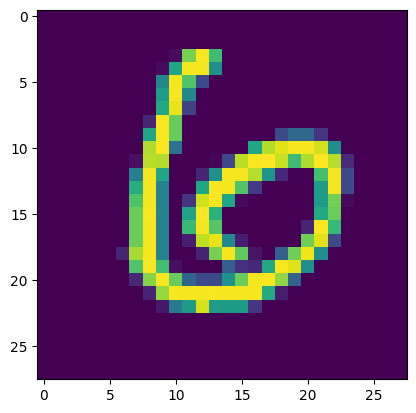

Predicted [1.9807016e-08 4.3605533e-09 1.1412657e-06 4.8136053e-07 1.6714468e-03
 1.6462678e-08 1.6648101e-11 3.2256902e-04 3.1081570e-04 9.9769354e-01]


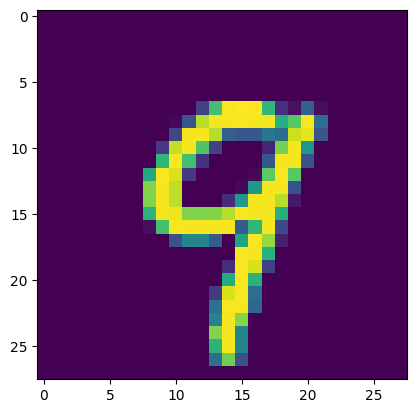

Predicted [9.9999994e-01 1.7796650e-12 3.5689698e-09 1.0465748e-11 3.2276176e-13
 3.0076734e-09 1.9299447e-08 2.4973076e-10 8.6274238e-10 3.0258057e-08]


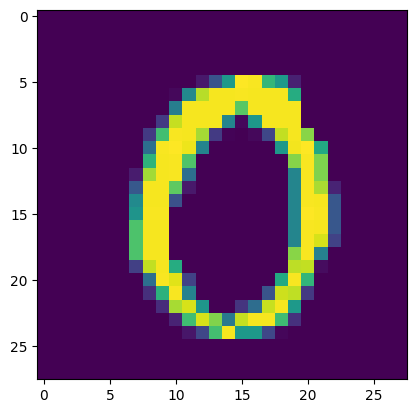

Predicted [4.4017983e-07 9.9999636e-01 7.5615127e-08 3.8163456e-10 4.8531939e-07
 1.3014012e-07 5.6168096e-07 1.0434558e-07 1.3985618e-06 4.3435591e-07]


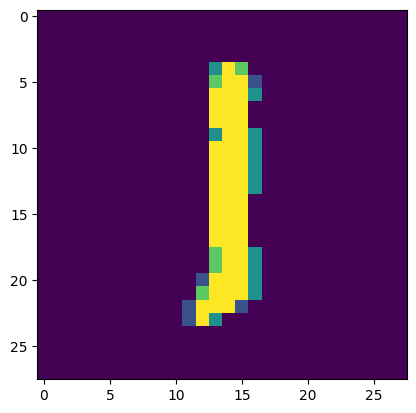

Predicted [4.3527995e-09 8.8295534e-12 4.3755595e-08 2.0259888e-04 4.5139093e-13
 9.9978495e-01 5.4812240e-08 7.9788502e-11 1.2332626e-05 3.3482351e-08]


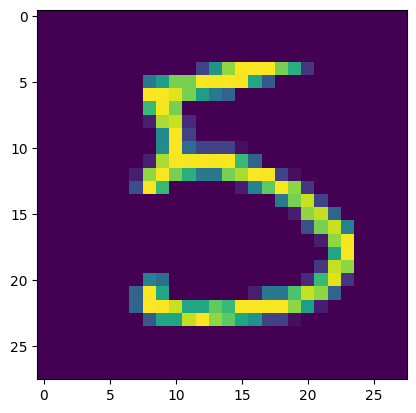

Predicted [1.6793291e-09 1.3538141e-11 6.7496266e-08 6.7807853e-09 5.5172106e-05
 1.7535244e-10 7.0507922e-13 7.1586219e-06 3.5720286e-06 9.9993390e-01]


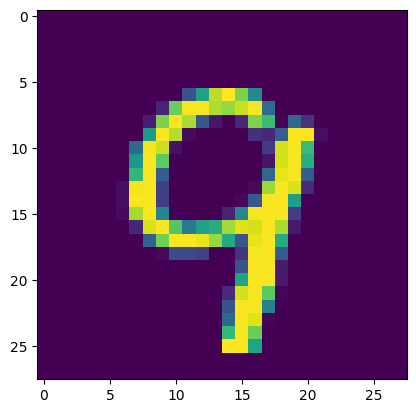

Predicted [5.3440460e-11 7.3063577e-10 5.5540713e-06 4.3049113e-07 6.7415282e-11
 2.2196585e-11 6.6884222e-20 9.9999374e-01 1.2816773e-09 1.7102441e-07]


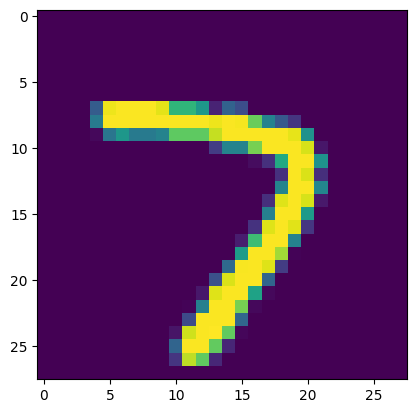

Predicted [3.2226197e-04 2.3264956e-06 1.3637294e-02 7.4036753e-01 1.4423550e-05
 2.1223560e-01 1.0471438e-06 3.7400424e-04 3.1880785e-02 1.1645927e-03]


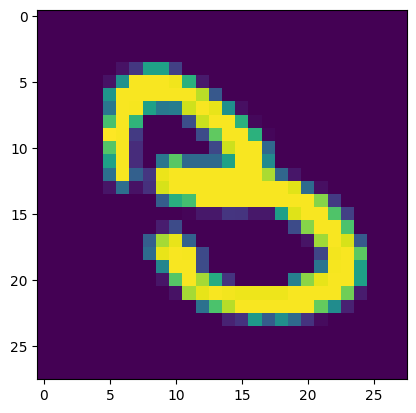

Predicted [9.8724447e-13 6.0285203e-09 4.6966022e-09 1.8510280e-11 9.9999934e-01
 4.9633614e-10 6.3761149e-12 7.0376210e-08 6.6593464e-09 4.2439572e-07]


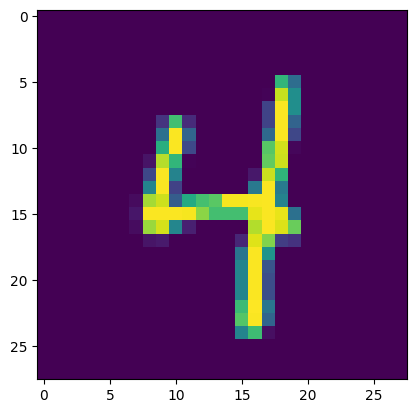

Predicted [4.4924711e-08 2.9951895e-08 1.8019867e-06 2.8271248e-05 4.7926075e-04
 2.0885049e-07 4.1991840e-12 1.8380126e-03 4.3203494e-05 9.9760908e-01]


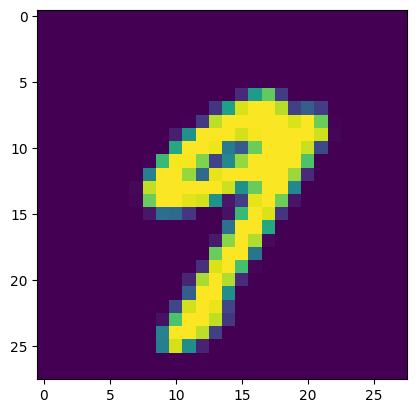

Predicted [2.9452049e-05 9.8979280e-10 2.1101752e-05 7.8948955e-07 1.0645091e-08
 9.0065878e-03 9.9002010e-01 3.6718539e-10 9.2159130e-04 2.2194412e-07]


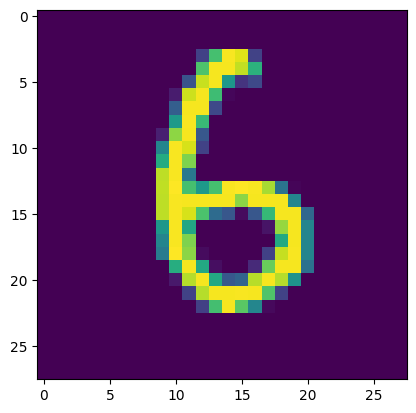

Predicted [1.7663366e-06 1.9608475e-12 7.5964945e-10 8.3371636e-11 8.8597449e-07
 2.5023470e-09 9.9999732e-01 1.3874050e-16 1.8390761e-08 1.5467673e-09]


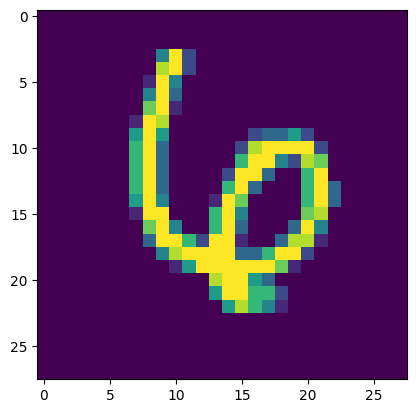

Predicted [2.29374870e-11 6.33004825e-13 2.09503716e-11 5.80452479e-06
 2.45778045e-14 9.99992907e-01 2.05716248e-07 1.00680525e-13
 1.64900257e-07 7.45743364e-07]


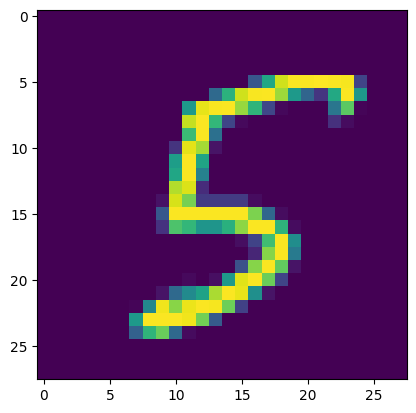

Predicted [2.7273675e-08 1.8198940e-05 3.2867712e-05 2.4741684e-07 9.9966741e-01
 8.2127713e-07 1.7183331e-07 6.7201850e-05 1.0085945e-05 2.0296279e-04]


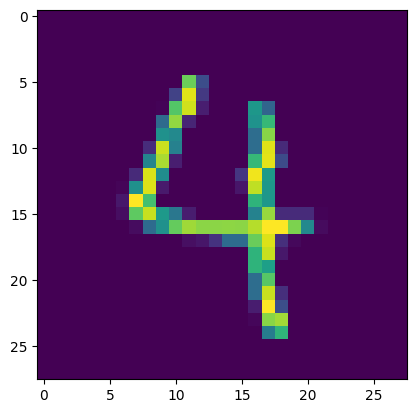

Predicted [9.9999803e-01 4.0942603e-11 1.2482093e-06 1.2674461e-10 2.5598453e-08
 3.2958254e-09 6.4871716e-07 1.9409806e-10 3.2894153e-08 1.7233948e-08]


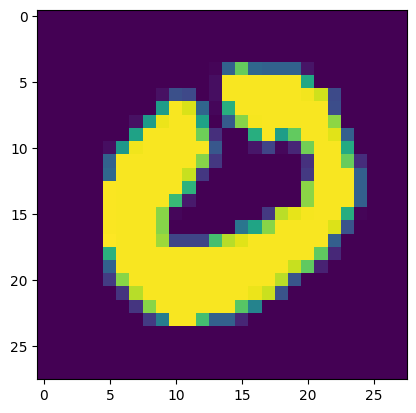

Predicted [1.24072488e-11 4.05918783e-08 7.02649231e-07 1.85094024e-07
 3.81968013e-09 1.27649636e-11 1.30810456e-18 9.99995530e-01
 4.48445725e-11 3.46839033e-06]


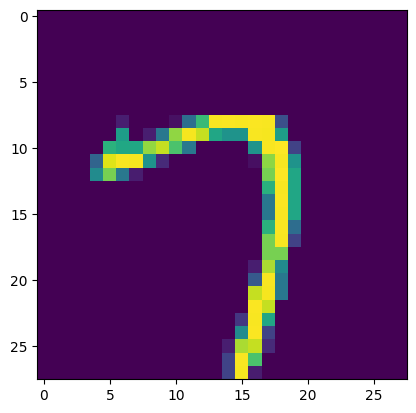

Predicted [1.9688151e-12 9.7358732e-11 6.7617101e-10 7.1750109e-13 9.9999934e-01
 7.7970005e-11 7.6289981e-12 6.6618583e-10 1.6255310e-09 5.4016596e-07]


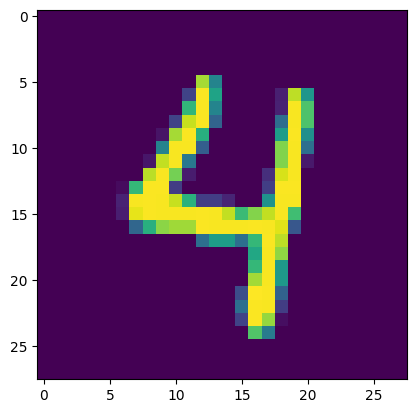

Predicted [9.9998897e-01 2.0780348e-08 6.1158562e-06 1.0236169e-08 5.8701648e-11
 1.2944056e-07 4.8991133e-08 1.2218711e-06 1.2564243e-06 2.1049157e-06]


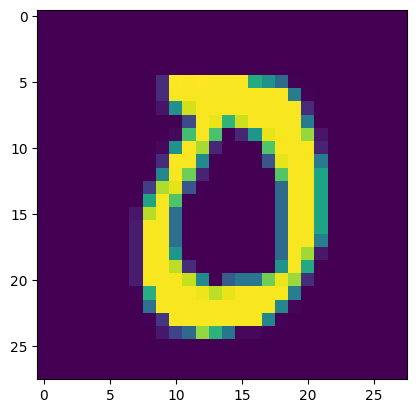

Predicted [6.6748711e-08 9.9703687e-01 3.7430493e-06 3.5218607e-06 2.6004930e-04
 2.3146208e-06 3.2602325e-09 3.4216431e-04 3.8017130e-05 2.3132563e-03]


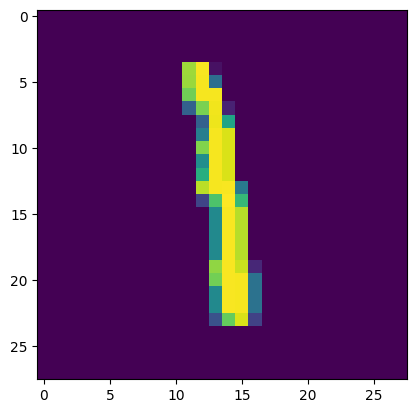

Predicted [1.3882752e-13 1.1288284e-08 7.2312093e-07 9.9999720e-01 3.8235456e-11
 3.8733864e-07 2.2367431e-14 1.1089340e-06 1.5039066e-07 4.6073114e-07]


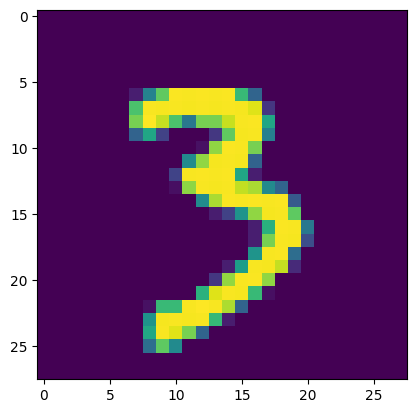

Predicted [1.8918114e-07 9.9998611e-01 2.7715112e-07 3.1091119e-09 2.8493280e-06
 6.7970056e-08 6.0016554e-08 9.0662348e-07 7.2190028e-07 8.6782275e-06]


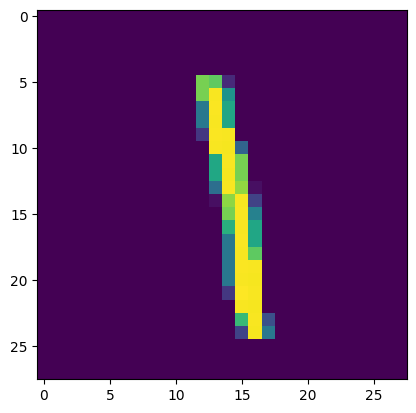

Predicted [1.3194680e-15 4.8792619e-09 4.6034913e-07 9.9999934e-01 4.9005698e-14
 4.5530516e-08 7.0988281e-15 7.8844835e-08 2.0548805e-08 1.4171024e-09]


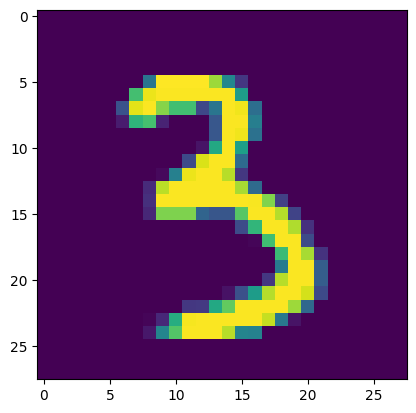

Predicted [4.4762847e-04 1.6320214e-06 2.3316054e-03 7.6738582e-10 9.9707073e-01
 1.7208250e-09 1.4829612e-04 3.0032851e-11 1.7284181e-08 2.4321927e-09]


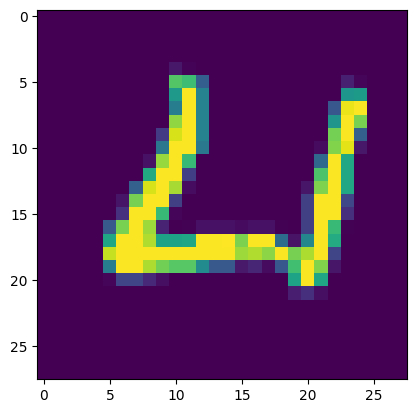

Predicted [7.1253697e-11 1.6220731e-07 1.2521209e-05 3.4713167e-07 7.4765246e-12
 4.0857814e-11 5.1786885e-16 9.9998683e-01 8.1263650e-08 1.0334135e-08]


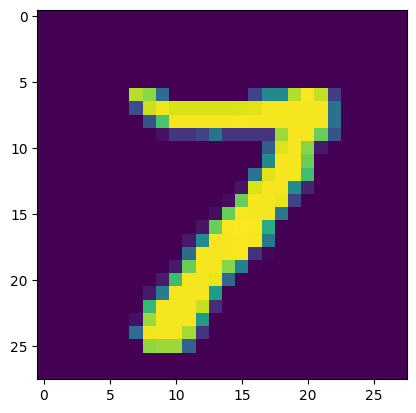

Predicted [3.4538374e-08 2.5707886e-05 9.9994034e-01 2.8818374e-06 3.2037237e-11
 1.6025457e-11 3.4979372e-12 3.0919564e-05 6.7129378e-08 5.9202104e-10]


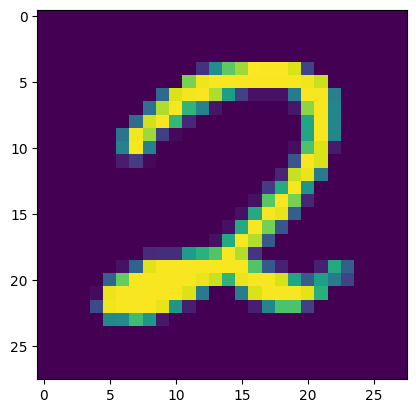

Predicted [1.0895911e-09 1.1849614e-06 1.8641109e-03 1.3596784e-04 1.9550248e-09
 1.1954127e-10 5.0209951e-14 9.9799854e-01 1.9598385e-08 8.5613983e-08]


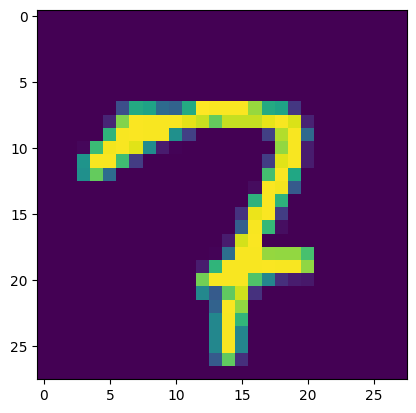

Predicted [1.8017650e-08 9.9997991e-01 2.8242007e-09 3.9180664e-10 5.9651188e-07
 9.8671160e-09 1.5232745e-09 2.1781971e-06 4.3462826e-08 1.7216331e-05]


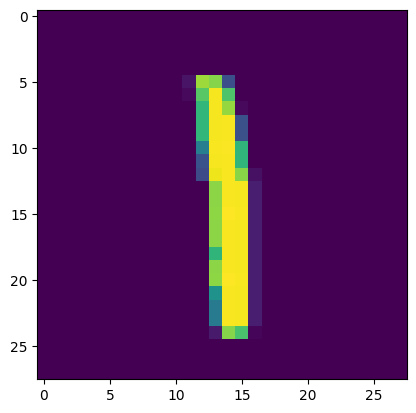

Predicted [4.0587108e-07 9.8796932e-05 9.9989945e-01 1.9090547e-07 2.9753494e-07
 6.2017863e-11 6.2353870e-08 4.3990218e-07 2.5600337e-07 2.8517719e-10]


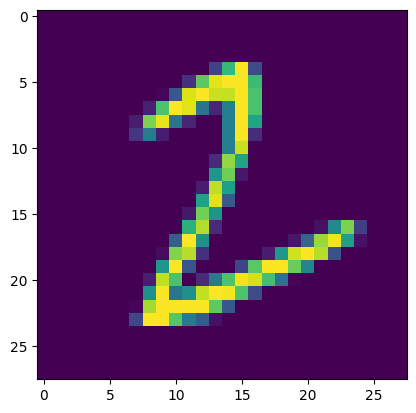

Predicted [8.0443314e-09 9.9999982e-01 1.0857807e-09 2.7845690e-12 8.8910426e-09
 2.4831546e-09 1.6542108e-08 1.9922181e-08 2.4430591e-08 3.5504698e-08]


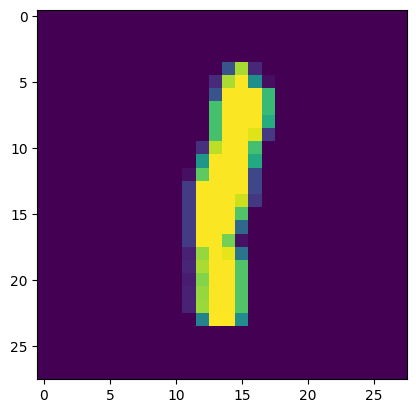

Predicted [4.8126754e-08 9.9999493e-01 3.7063216e-08 6.8017106e-11 3.7655641e-06
 1.7875523e-08 9.9323136e-09 4.9262724e-07 2.5619340e-07 4.3036110e-07]


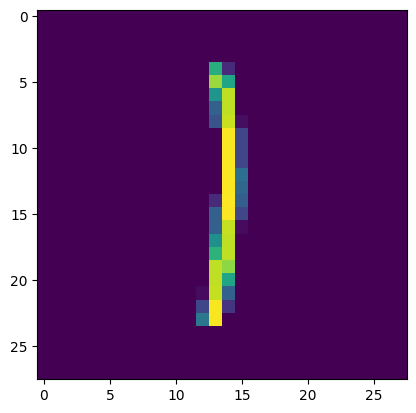

Predicted [1.15809062e-09 1.53242028e-04 1.38732023e-03 7.22497134e-05
 2.54268656e-07 2.82319224e-10 1.55121131e-12 9.98384893e-01
 1.04527935e-07 1.79020060e-06]


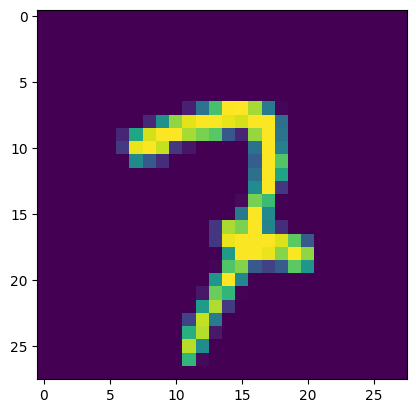

Predicted [6.8927377e-12 1.5361076e-08 2.5584754e-09 2.3246943e-12 9.9998969e-01
 5.2243737e-11 3.0368033e-10 9.1248742e-10 6.0974186e-09 1.0267733e-05]


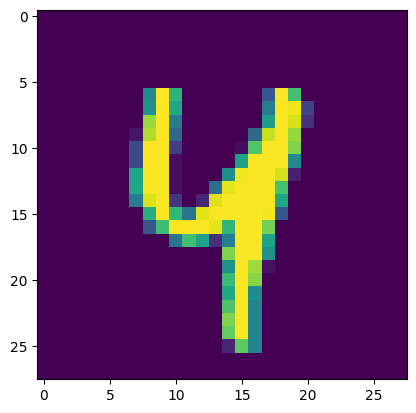

Predicted [6.6322076e-07 2.4527382e-02 8.7481815e-01 1.4983173e-06 9.9146992e-02
 1.1136451e-04 2.0848402e-05 3.7522004e-05 1.3357307e-03 9.2400247e-09]


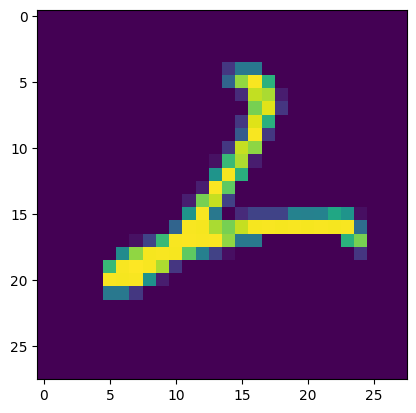

Predicted [1.6023112e-11 1.6177581e-05 1.5760550e-05 9.9984932e-01 3.5338637e-08
 5.5743261e-05 1.6045111e-10 4.6918645e-05 7.9367092e-06 8.0019408e-06]


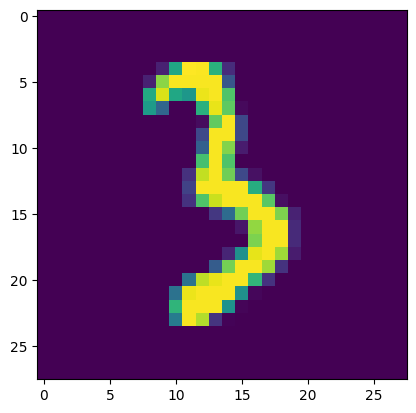

Predicted [3.2795984e-09 7.2891991e-11 3.8373944e-08 1.3102578e-04 7.7970605e-13
 9.9983835e-01 8.8554103e-08 7.4452139e-10 2.9709629e-05 8.2451453e-07]


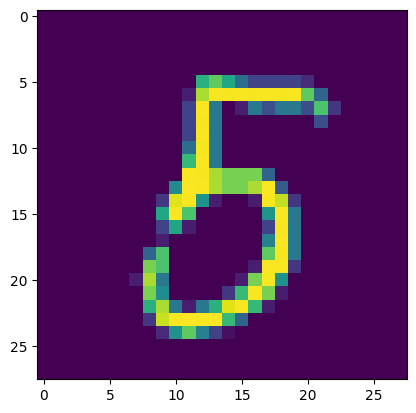

Predicted [8.7168502e-08 9.9977279e-01 2.1282065e-05 1.7888715e-07 8.0993792e-05
 7.2117103e-07 1.4088199e-07 5.5148543e-05 2.7111211e-05 4.1485389e-05]


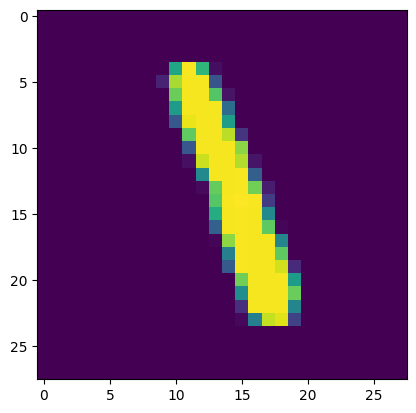

Predicted [2.8295926e-11 7.3370757e-07 9.9999624e-01 3.9822527e-07 1.7309048e-09
 4.2106239e-11 3.5178579e-12 2.5349568e-06 1.5659159e-08 7.5436905e-12]


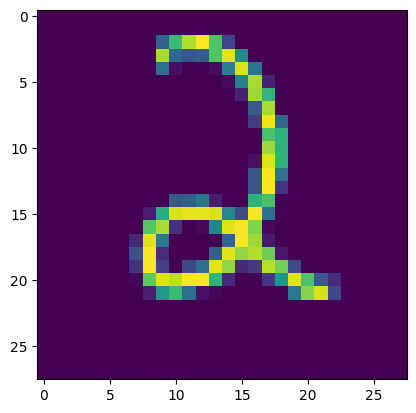

Predicted [3.93169004e-13 1.59659308e-09 1.13644649e-09 9.07830200e-11
 9.99984920e-01 5.38230260e-09 1.19809301e-11 3.97221323e-09
 4.03924005e-09 1.49760235e-05]


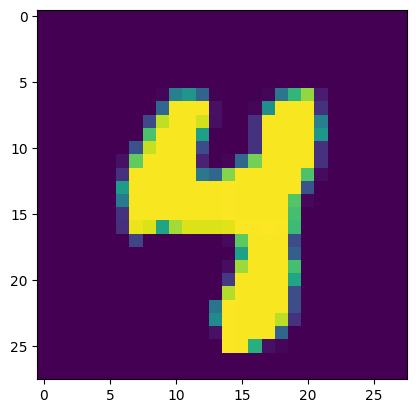

Predicted [9.9929925e-14 7.0730904e-10 2.8153330e-10 1.2075757e-13 9.9999994e-01
 5.3049898e-11 6.1721274e-11 1.3286572e-10 1.4867489e-10 9.5040473e-09]


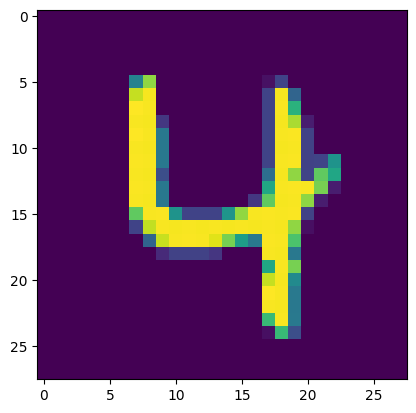

Predicted [2.6537960e-05 2.2625798e-08 2.0607477e-07 1.0407902e-08 9.0588074e-08
 1.8053989e-04 9.9976969e-01 1.4365087e-11 2.2837588e-05 3.2290792e-09]


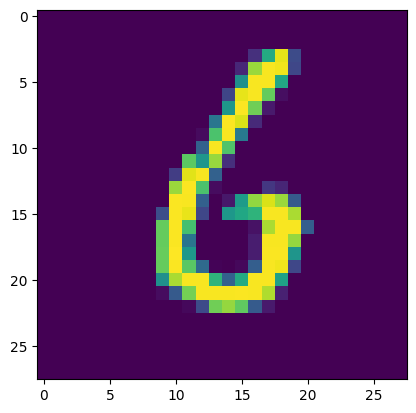

Predicted [5.4595217e-12 6.9452478e-11 5.5829933e-06 9.9998719e-01 4.9309656e-13
 3.7886838e-07 3.8859483e-15 5.0883446e-06 1.6092520e-06 4.2521396e-08]


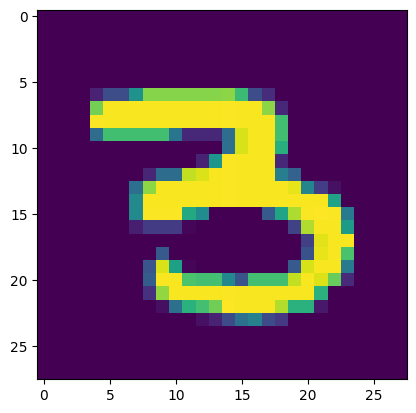

Predicted [1.8164406e-13 1.9532393e-14 2.0814327e-12 1.6783408e-06 6.1119146e-14
 9.9999791e-01 9.9967018e-08 1.2475126e-14 7.1256764e-08 1.8714310e-07]


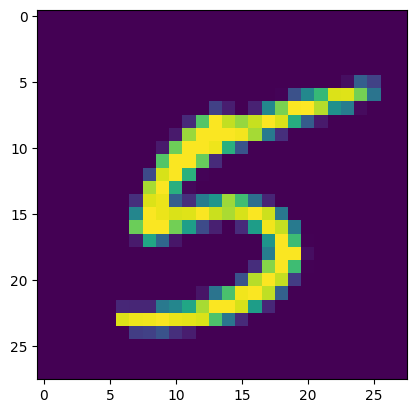

Predicted [3.94561939e-10 1.12686573e-13 8.93756680e-10 1.08522927e-05
 1.14026314e-11 9.99985635e-01 7.21122984e-09 4.36825819e-11
 2.78483549e-06 7.11643793e-07]


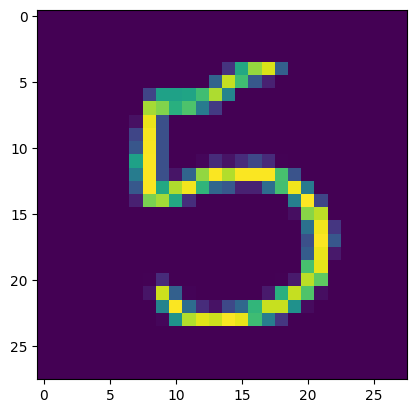

Predicted [1.0857292e-06 1.3734050e-16 9.1939650e-13 1.7755887e-10 4.5987150e-10
 3.0052095e-07 9.9999851e-01 8.1653771e-20 2.0186155e-08 7.6470208e-10]


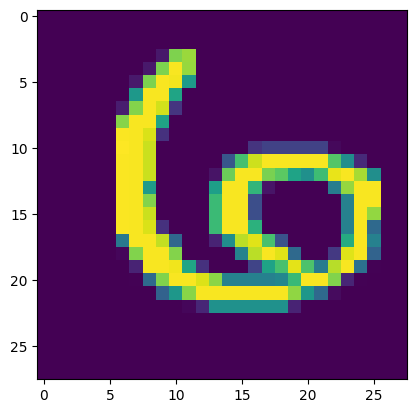

Predicted [9.99999821e-01 1.28239419e-09 1.35056609e-07 4.30583780e-12
 1.21605946e-11 5.63664226e-10 1.55576974e-08 1.15831735e-08
 4.13912948e-09 2.16662266e-09]


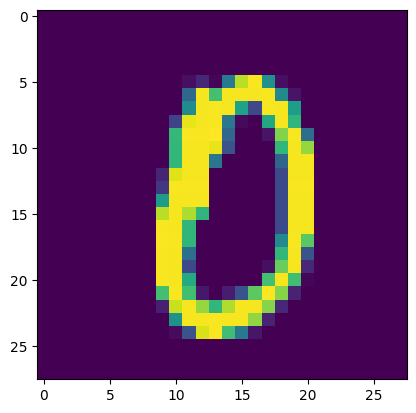

Predicted [2.5665819e-12 1.4893750e-09 7.1358062e-09 8.5589820e-13 9.9999994e-01
 3.7658932e-11 1.4112089e-10 6.1436167e-09 4.2291215e-10 3.4094100e-08]


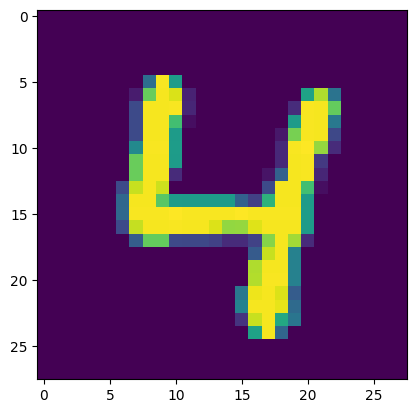

Predicted [1.1975320e-08 9.9999386e-01 1.4372112e-08 3.5368895e-12 5.4550937e-06
 4.4287698e-09 5.9156533e-09 5.2315755e-07 3.6183692e-08 9.3995595e-08]


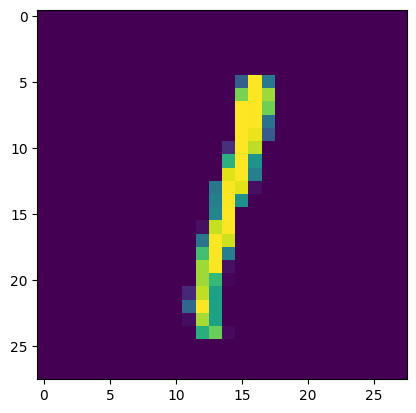

Predicted [2.8820672e-11 2.6659209e-13 3.2484306e-09 3.2570870e-08 9.4615098e-06
 2.7217537e-10 6.7881009e-17 5.8219284e-06 1.0163154e-07 9.9998444e-01]


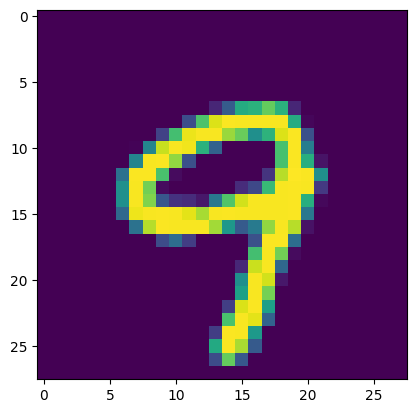

Predicted [2.0305177e-10 2.6579046e-06 1.3986944e-07 1.3136405e-04 2.3049844e-05
 9.9481982e-01 9.8027431e-06 4.5652883e-05 4.3046009e-03 6.6302886e-04]


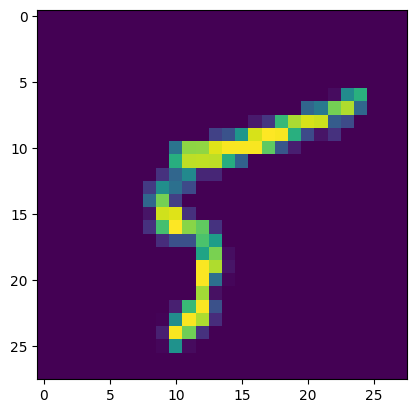

Predicted [2.1488263e-12 3.8534789e-09 9.3402355e-07 8.7730714e-06 1.9934319e-09
 4.3679277e-10 1.1803883e-18 9.9998957e-01 3.2134367e-10 5.4957496e-07]


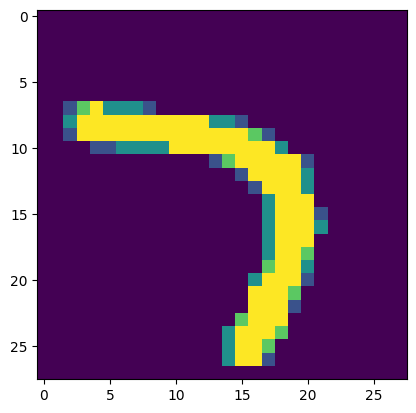

Predicted [3.8775178e-07 7.3356921e-10 1.2135784e-03 8.0299847e-05 1.0872834e-07
 1.9602888e-04 1.9343109e-07 1.9950912e-06 9.9843240e-01 7.5069220e-05]


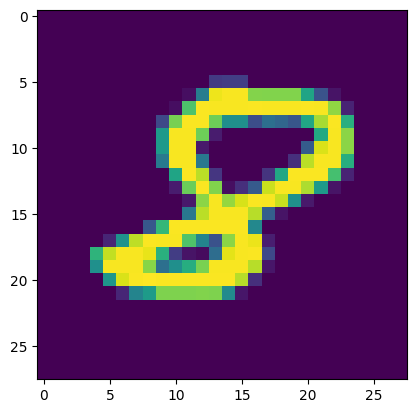

Predicted [6.41601127e-06 3.36314442e-05 3.32358060e-04 6.38422964e-04
 1.52017465e-05 3.09879873e-02 7.66341657e-07 5.64378500e-02
 6.41289493e-03 9.05134559e-01]


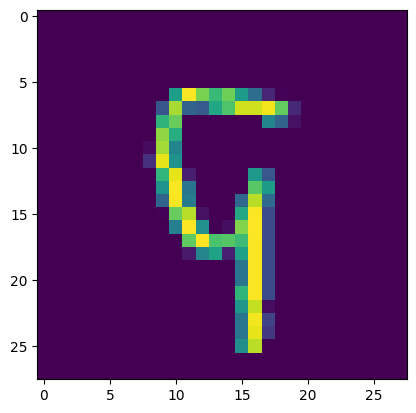

Predicted [7.19085680e-10 1.60591037e-04 2.39364170e-02 9.74429786e-01
 1.39904355e-09 7.33272691e-06 7.79276019e-11 1.35804072e-03
 1.05284234e-04 2.50412654e-06]


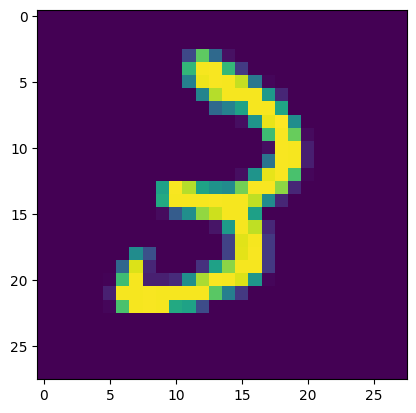

Predicted [1.2484339e-14 3.1965167e-11 3.4768805e-06 2.5142018e-07 8.3685350e-12
 7.5302528e-11 5.8974876e-19 9.9999613e-01 9.4669808e-08 3.4907710e-10]


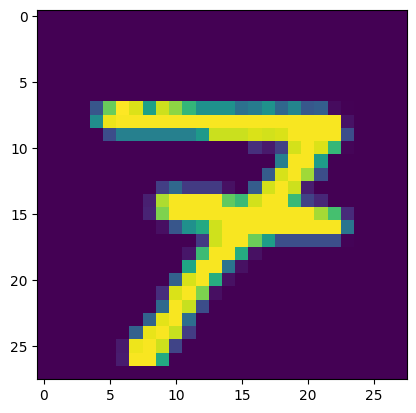

Predicted [6.1689711e-09 9.5972668e-05 2.0158454e-06 2.7136615e-08 9.9869859e-01
 2.8140343e-07 7.7640822e-10 2.8224295e-04 1.6883481e-06 9.1919745e-04]


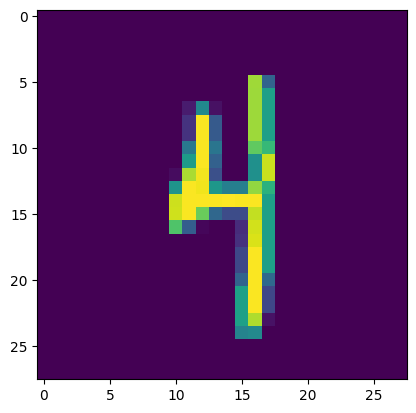

Predicted [8.4900018e-04 1.0465510e-10 4.3476052e-07 1.7093311e-07 2.8807919e-05
 1.0175708e-06 9.9911106e-01 2.5919048e-13 2.3769232e-06 7.0219412e-06]


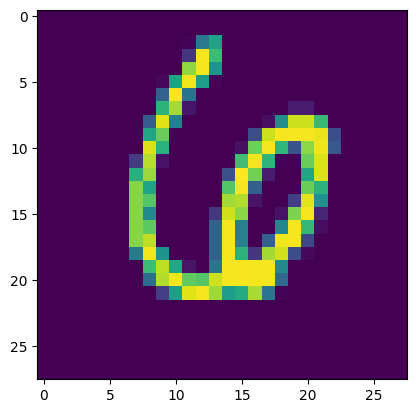

Predicted [2.0570348e-10 8.7527305e-08 1.4966448e-08 4.5196907e-10 9.9991137e-01
 4.1100368e-08 1.6397461e-09 1.1267161e-08 6.5562553e-08 8.8397595e-05]


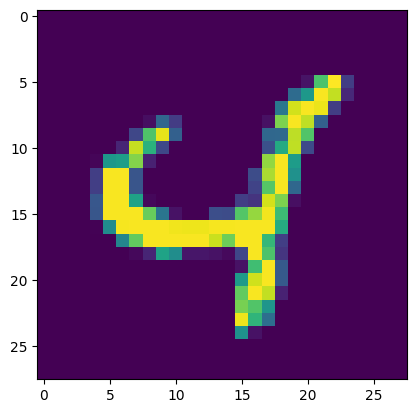

Predicted [4.3476561e-14 2.3845028e-09 8.0399030e-07 9.9999756e-01 1.4841321e-15
 5.7520111e-07 2.1237511e-13 4.2987715e-08 9.5666519e-07 2.7739646e-09]


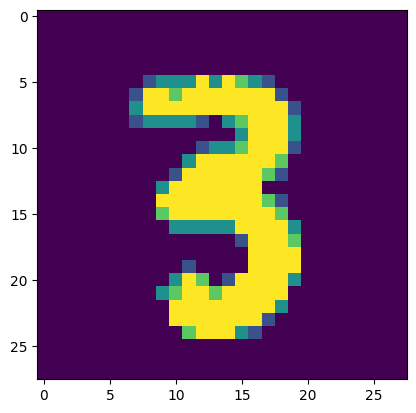

Predicted [9.9999505e-01 2.8858161e-11 3.6028220e-07 1.3297213e-09 1.2444532e-10
 3.1365282e-08 4.4251633e-06 8.7775533e-12 4.0725556e-08 6.6356371e-08]


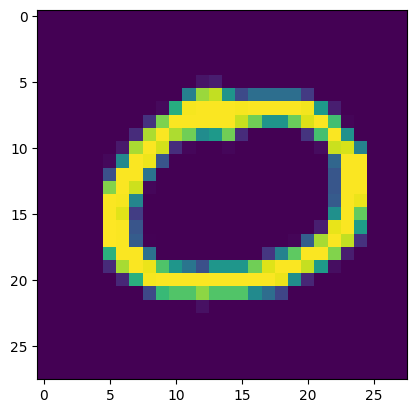

Predicted [1.2086748e-10 1.2795558e-09 4.9516702e-06 5.1851207e-06 3.1247724e-10
 5.3992841e-11 2.4587396e-19 9.9998885e-01 6.0727618e-09 9.0695289e-07]


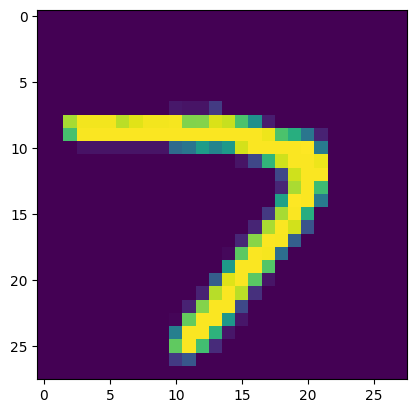

Predicted [9.9999958e-01 3.3839522e-13 2.1660570e-08 3.9197538e-12 1.5525772e-11
 9.6790753e-10 2.5204303e-09 2.1588328e-10 6.3424038e-10 3.1542180e-07]


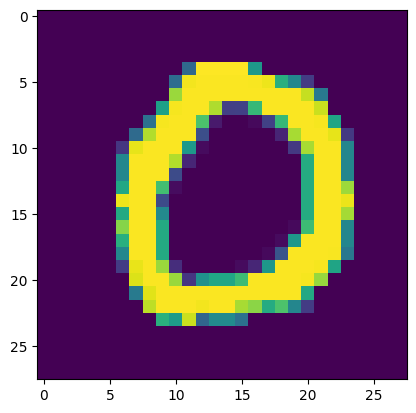

Predicted [1.55528070e-08 3.52946785e-07 9.99998271e-01 9.72637963e-07
 5.05956518e-12 2.93256652e-12 4.74789045e-13 3.19134017e-07
 9.68255254e-10 1.08915106e-10]


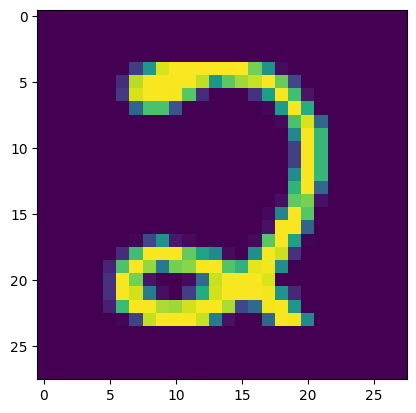

Predicted [4.5561131e-07 5.9666189e-07 5.7002162e-05 6.1886094e-06 1.3627133e-05
 3.6519758e-08 1.6056261e-12 4.7951685e-03 7.9601593e-02 9.1552532e-01]


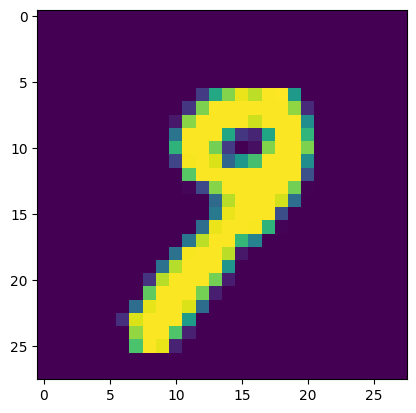

Predicted [1.17790853e-08 9.99998629e-01 1.13217180e-09 7.98976423e-12
 1.12134991e-07 3.13922510e-09 1.44403804e-08 1.51478787e-07
 2.58934474e-08 1.05450590e-06]


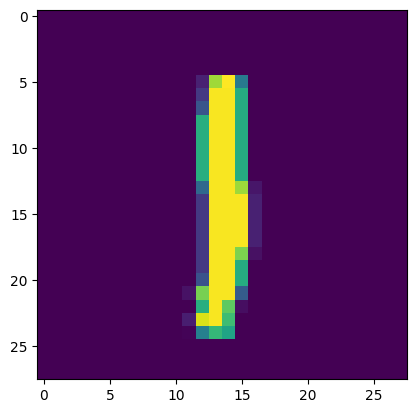

Predicted [3.3310053e-11 2.4157990e-07 4.9614567e-07 9.7011457e-07 3.5425871e-06
 9.0346380e-10 2.7153467e-13 9.9999446e-01 3.7032866e-09 2.7142005e-07]


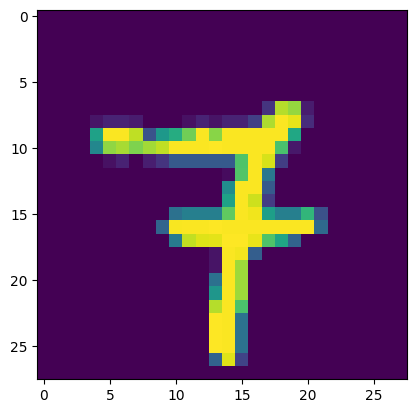

Predicted [1.9169971e-15 1.3350683e-10 5.4921017e-08 9.9999934e-01 1.1553566e-14
 6.2819385e-07 5.0888127e-14 6.7615680e-10 1.1934252e-08 1.5749840e-09]


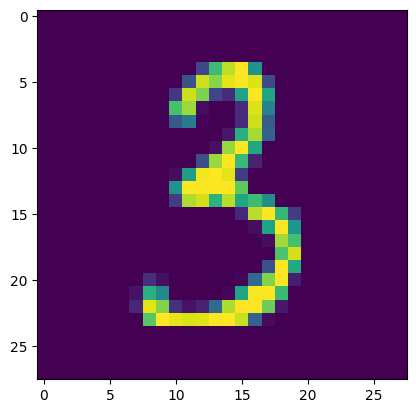

Predicted [6.9263723e-07 2.3836603e-05 9.9986148e-01 8.9474333e-06 1.6962986e-08
 5.0486094e-11 5.1195016e-12 1.0474181e-04 6.8571865e-08 1.1340263e-07]


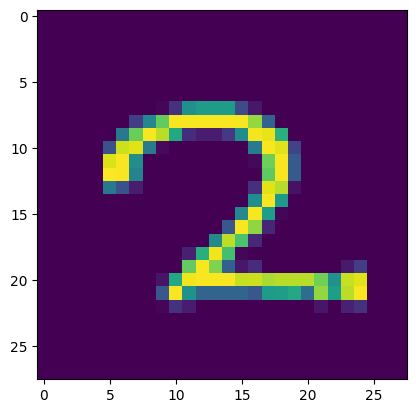

Predicted [7.0808924e-06 6.0591326e-08 2.9803455e-04 4.2061465e-06 1.9637214e-02
 7.9217074e-07 1.1214796e-07 6.6637847e-05 1.3368630e-01 8.4629965e-01]


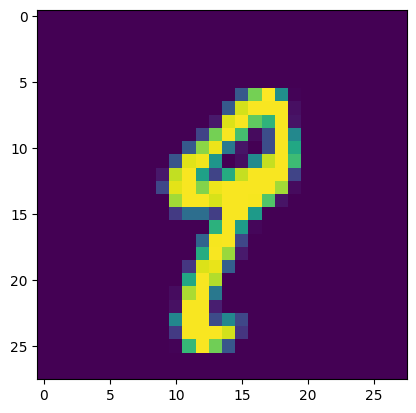

Predicted [2.3577409e-09 2.2782311e-07 6.4586064e-05 2.4316932e-05 2.7524132e-08
 1.2442272e-10 6.5933188e-16 9.9981165e-01 3.3522338e-07 9.8851408e-05]


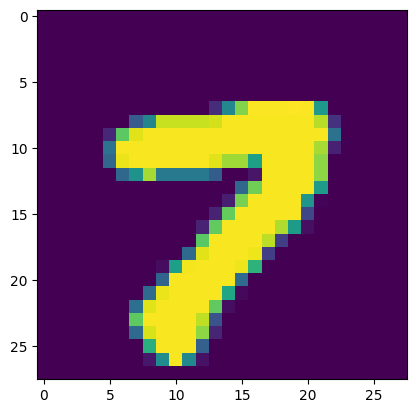

Predicted [1.2562667e-08 2.9113233e-05 1.0061777e-06 1.9658508e-08 8.0083225e-08
 6.4173991e-09 4.8821266e-13 9.9993998e-01 5.5734245e-10 2.9774259e-05]


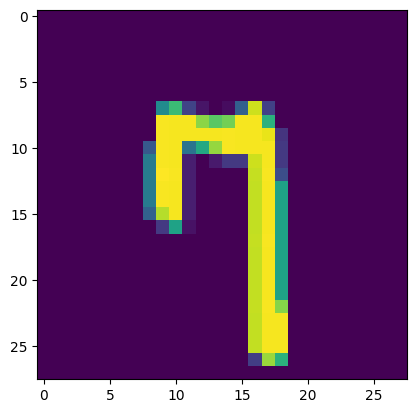

Predicted [1.9013071e-06 9.1475373e-13 4.5432555e-10 2.2763662e-11 9.8651309e-09
 5.4145435e-06 9.9999231e-01 2.0151439e-16 3.9644883e-07 1.9769539e-10]


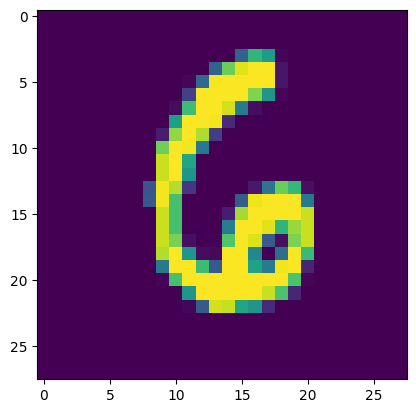

Predicted [2.6510070e-11 7.2892035e-05 9.9990851e-01 6.1357662e-07 4.4809013e-12
 1.8351425e-12 1.5027972e-14 1.7879904e-05 1.7715963e-10 7.3421075e-11]


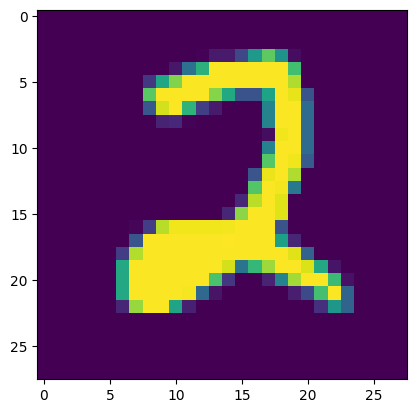

Predicted [2.8717421e-12 2.2015893e-08 9.0533362e-08 3.9250345e-08 8.4564322e-10
 1.2852477e-10 9.4601189e-18 9.9999326e-01 1.2178394e-10 6.5651020e-06]


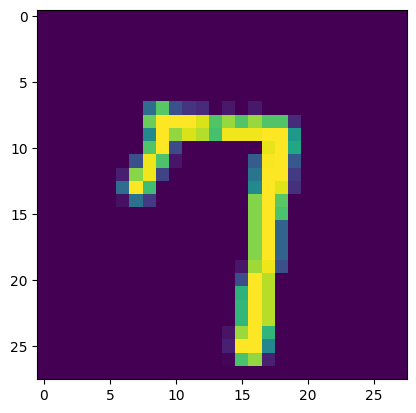

Predicted [1.10569787e-09 2.30969920e-13 1.70822325e-08 7.46059270e-10
 7.20715116e-06 2.04932644e-06 1.32359210e-05 5.06710993e-11
 9.99977291e-01 1.02904934e-07]


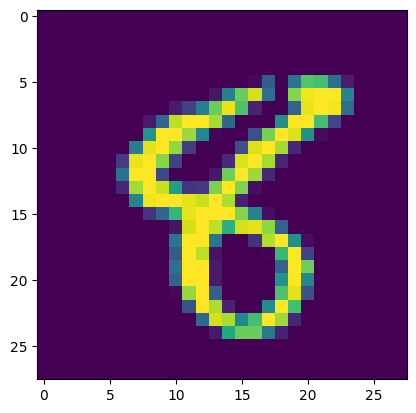

Predicted [7.8431489e-13 3.8098830e-07 6.2372415e-08 1.7611284e-11 9.9999851e-01
 1.0055323e-10 4.1817144e-12 7.0607240e-07 1.1294496e-09 2.0914837e-07]


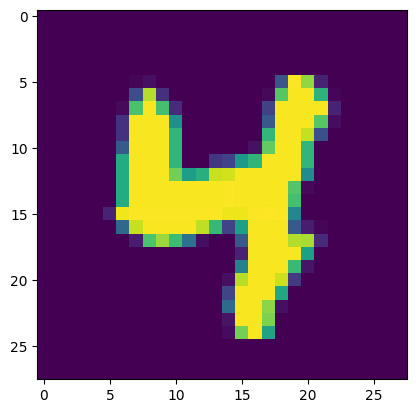

Predicted [1.23082503e-10 4.66227903e-06 5.39021858e-06 2.51487359e-06
 1.47770445e-08 3.91222367e-11 2.24646796e-15 9.99975741e-01
 1.03940749e-08 1.16891324e-05]


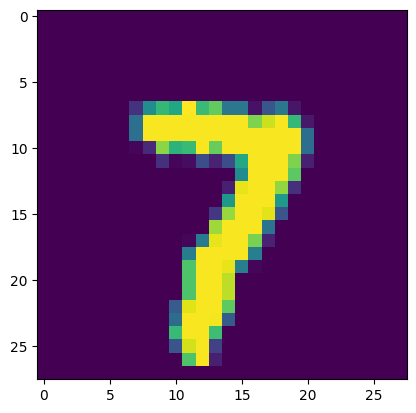

Predicted [9.3123068e-13 8.9535263e-07 2.3450516e-03 9.8506099e-01 9.4614137e-08
 1.3723596e-07 2.7048420e-12 1.2589957e-02 2.8130446e-06 4.1922593e-08]


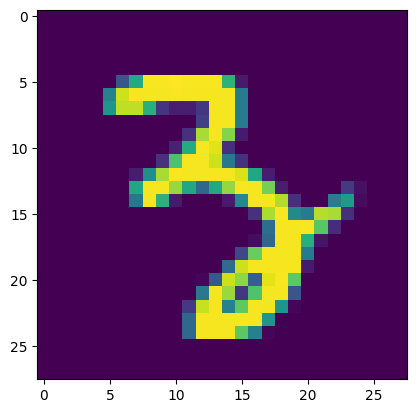

Predicted [9.65948246e-08 8.93280567e-13 1.25064265e-11 5.90007340e-12
 3.96239326e-11 1.38752529e-08 9.99999821e-01 6.56383367e-18
 8.34543457e-09 2.43562579e-14]


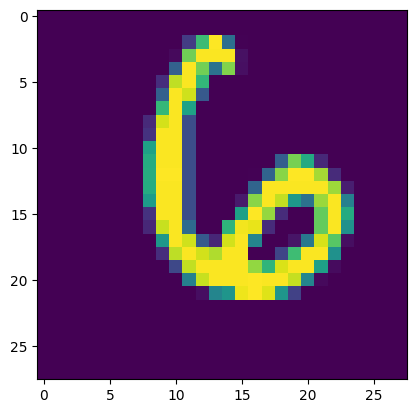

Predicted [3.1213787e-07 9.9998218e-01 4.2395115e-07 3.2225167e-09 6.5043364e-06
 1.2417502e-07 2.1670878e-06 1.5315746e-06 4.9993905e-06 1.6487468e-06]


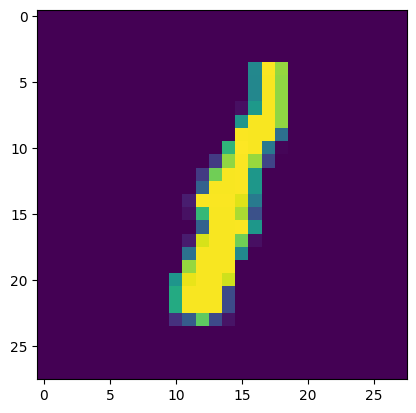

Predicted [4.7892595e-14 6.8260944e-12 1.3715555e-07 9.9999958e-01 8.0218996e-16
 5.6171348e-08 7.7271360e-15 1.9328497e-09 1.9692450e-07 1.3624539e-08]


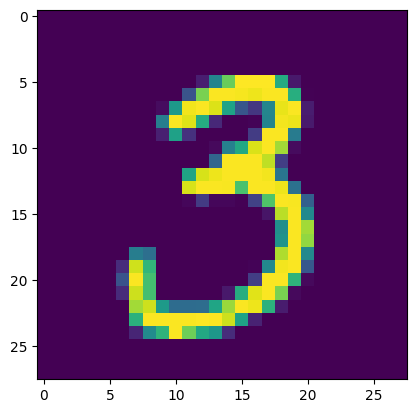

Predicted [1.0061359e-06 1.6111931e-11 1.6195685e-10 1.2346428e-11 4.4480832e-09
 1.0616009e-05 9.9998707e-01 1.5507257e-15 1.2535255e-06 4.5482518e-10]


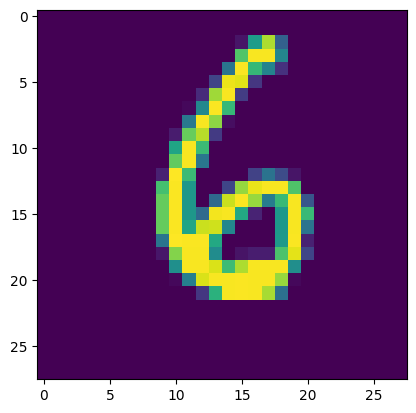

Predicted [2.2143699e-05 1.2346241e-06 6.5421293e-05 9.0605909e-06 4.5457199e-02
 7.4331001e-06 2.5085408e-06 9.8016195e-04 2.8469756e-03 9.5060790e-01]


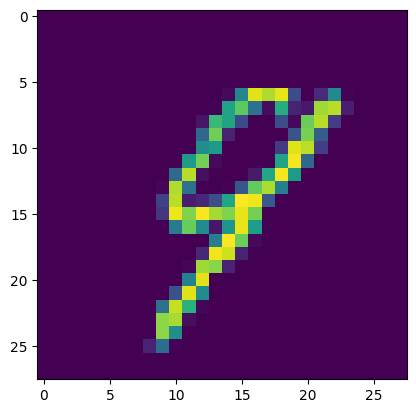

Predicted [2.6290179e-09 4.0149225e-05 1.3476289e-04 9.9945962e-01 8.5478842e-09
 3.4630571e-05 1.5339766e-11 8.1156737e-05 2.5024405e-05 2.2464947e-04]


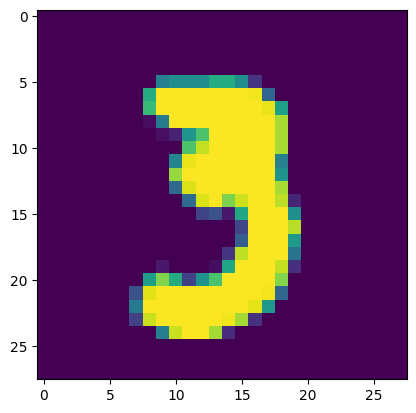

Predicted [6.8789106e-08 9.9998039e-01 2.8979932e-06 9.4171764e-09 8.3490104e-06
 8.9353811e-08 1.1289672e-07 2.4248905e-06 1.4530698e-06 4.1669978e-06]


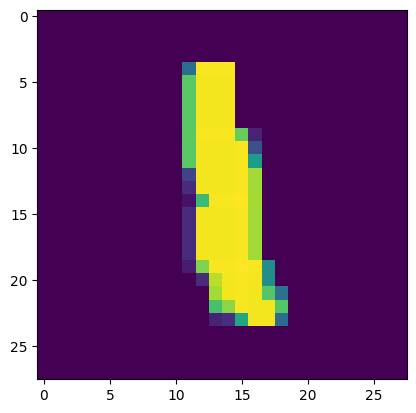

Predicted [7.8766234e-06 1.3377380e-07 3.9897986e-06 3.5304780e-11 9.9839765e-01
 5.3467303e-08 9.9621713e-04 3.2347873e-09 5.9316837e-04 8.6309961e-07]


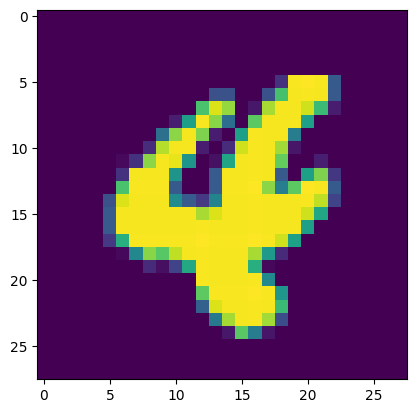

Predicted [1.1242424e-07 9.9467164e-01 6.5677974e-05 5.9023456e-05 3.6911410e-04
 1.5485974e-05 4.2833538e-08 2.7925016e-03 1.0600257e-04 1.9202898e-03]


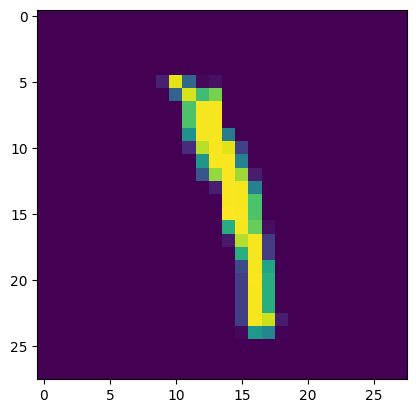

Predicted [7.30294020e-11 2.10215694e-06 8.64141912e-04 1.40911857e-06
 1.25346278e-05 2.04638937e-08 2.17037803e-12 9.99116659e-01
 3.01400496e-06 1.22273125e-08]


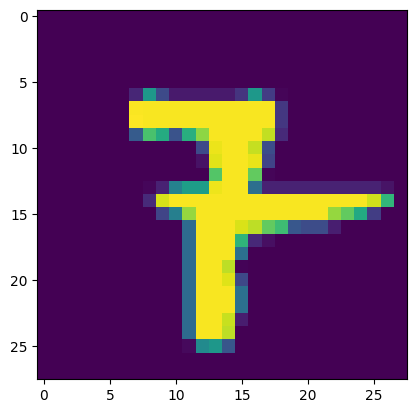

Predicted [6.0091098e-04 3.9036624e-10 2.8612479e-04 7.2340605e-08 5.8432327e-08
 5.6935602e-04 9.9849141e-01 2.8585264e-13 5.2014453e-05 5.2644167e-10]


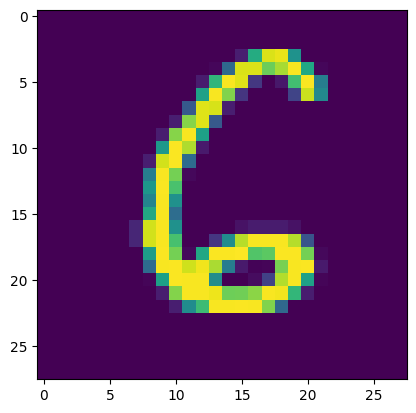

Predicted [3.3713643e-09 1.0678332e-11 1.0541319e-06 5.8155507e-08 1.1829858e-06
 3.9620220e-11 2.6657298e-15 2.9837945e-05 5.5276587e-07 9.9996716e-01]


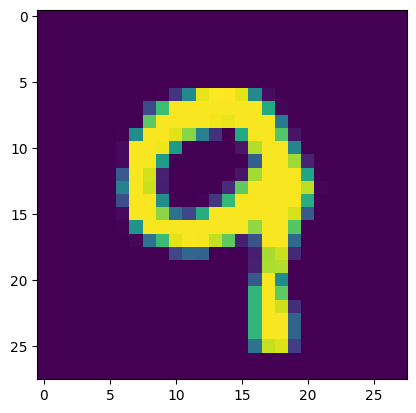

In [43]:
%matplotlib inline
# viewing images
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(100):
  plt.imshow(x_test[i].reshape((28,28)), interpolation='nearest')
  print("Predicted",test_labels[i])
  plt.show()

#Completing tasks

1) In the network presented below (this is the same network as used above), you need to add several neurons to the input layer (+5 neurons)

In [44]:
model = Sequential()
model.add(Conv2D(37, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape, kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    synchronized=False)
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

datagen = ImageDataGenerator( featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=20,
                             zoom_range= 0.15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.15,
                             horizontal_flip=False,
                             vertical_flip=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2) Train the corrected network. Pay attention to the changes that have occurred.

3) В сети из задания номер 1 поменять тип регуляризации с 'l1' на 'l2'

4) In the hidden layer, change the number of neurons from 128 to a larger one, for example 160.

5) Make the probability of eliminating neurons for training (Dropout) equal to 0.3 in each case.

6) Add another convolutional layer having the following pattern (model.add(Conv2D(1, (3,3)), activation='relu', padding='same', kernel_initializer='he_normal')). Instead of 1, put the desired number of neurons. Train the model and look at the results.

*) If the previous tasks were quite simple, it is necessary to configure the construction of the network in such a way that the model is less likely to confuse the number 8 with other numbers (see confusion matrix).

modified model

In [46]:
datagen.fit(X_train)
h = model.fit(datagen.flow(X_train, Y_train, batch_size = batch_size),
                        epochs = epochs, validation_data = (X_val, Y_val),
                        callbacks=[early_stopping],
                        verbose=1, steps_per_epoch=X_train.shape[0] // batch_size
                        ,)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 134s 178ms/step - accuracy: 0.9175 - loss: 0.4421 - val_accuracy: 0.9632 - val_loss: 0.2227
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 135s 180ms/step - accuracy: 0.9363 - loss: 0.3028 - val_accuracy: 0.9710 - val_loss: 0.1631
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 137s 182ms/step - accuracy: 0.9441 - loss: 0.2488 - val_accuracy: 0.9727 - val_loss: 0.1379
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 135s 174ms/step - accuracy: 0.9499 - loss: 0.2162 - val_accuracy: 0.9754 - val_loss: 0.1280
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 131s 175ms/step - accuracy: 0.9557 - loss: 0.1923 - val_accuracy: 0.9804 - val_loss: 0.1064
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 135s 180ms/step - accuracy: 0.9567 - loss: 0.1815 - val_accuracy: 0.9793 - val_loss: 0.1015
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 136s 182ms/step - accuracy: 0.9579 - loss: 0.1666 - val_accuracy: 0.9836 - val_loss: 0.0784
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 184ms/step - accuracy: 0.9621 -

In [47]:
Y_pred=model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)
print(confusion_matrix(Y_true, Y_pred_classes))

375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step
[[1173    0    3    1    1    1    2    0    2    0]
 [   0 1334    4    0    4    1    2    8    0    1]
 [   1    0 1188    2    1    0    0    0    2    0]
 [   0    0    3 1244    0    5    0    0    0    0]
 [   0    2    3    0 1210    0    0    0    0    2]
 [   0    0    0    2    0 1077    2    1    1    0]
 [   0    0    0    0    4    5 1156    0    4    0]
 [   0    0   11    3    7    0    0 1194    0    5]
 [   0    1    2    4    1    3    3    0 1151    1]
 [   3    0    1    3   12    7    1    3    7 1125]]
